In [41]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for easier handling
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Train KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
# Test different values of k (e.g., 3, 5, 7)
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    print(f"Results for k={k}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Results for k=3:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Results for k=5:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Results for k=7:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0      

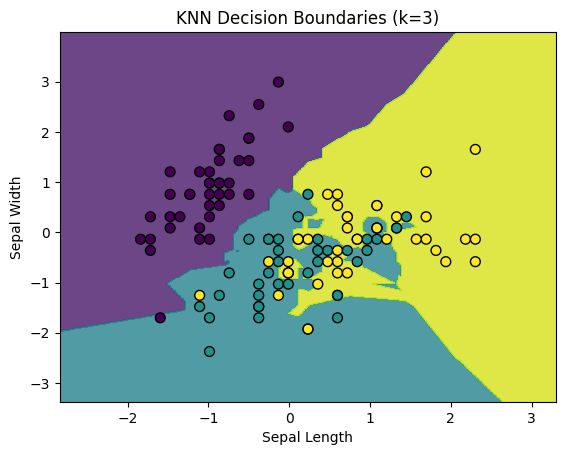

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for easy visualization (sepal length and sepal width)
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Scale the data
X_train_2d_scaled = scaler.fit_transform(X_train_2d)
X_test_2d_scaled = scaler.transform(X_test_2d)

# Create the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2d_scaled, y_train)

# Visualize the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.title("KNN Decision Boundaries (k=3)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


Part B: Naive Bayes on SMS Spam Collection Dataset


In [47]:
import pandas as pd

# Load the dataset (make sure to download the CSV file from Kaggle)
sms_data = pd.read_csv('data/spam.csv')

# Data Cleaning (removing unnecessary columns)
sms_data = sms_data[['Category', 'Message']]
sms_data.columns = ['Category', 'Message']

# Check the first few rows
sms_data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
import string

# Convert messages to lowercase and remove punctuation
sms_data['Message'] = sms_data['Message'].apply(lambda x: x.lower())
sms_data['Message'] = sms_data['Message'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Check the cleaned data
sms_data.head()


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize the messages
X = vectorizer.fit_transform(sms_data['Message'])
y = sms_data['Category'].map({'ham': 0, 'spam': 1})


In [52]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

# Train Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nPrecision, Recall, F1-Score:")
print(precision_recall_fscore_support(y_test, y_pred, average='binary'))


ValueError: Input y contains NaN.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predictions
y_pred_bnb = bnb.predict(X_test)

# Evaluate
print("BernoulliNB Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))

print("\nBernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))

print("\nBernoulliNB Precision, Recall, F1-Score:")
print(precision_recall_fscore_support(y_test, y_pred_bnb, average='binary'))


NaN values in y_train: 1
NaN values in y_test: 0


ValueError: Input y contains NaN.